# Jordan's COVID Stock Quick Analyzer

input the stock symbol in the box below and then run the rest of the code for a quick analysis of the stock and how COVID-19 has affected it vs the market.

## Input Symbol Below

In [1]:
symbol = 'AAPL'

## Now all you have to do is run the rest of the code!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from matplotlib.ticker import FuncFormatter
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
NASDAQ = yf.Ticker("^IXIC").history(period="2y")
NASDAQ['date'] = NASDAQ.index
NASDAQ = NASDAQ.reset_index(drop=True)

In [4]:
name = yf.Ticker(symbol)
data = name.history(period="2y")
data['date'] = data.index
data = data.reset_index(drop=True)

In [5]:
def stock_info(stock_data):
    df1 = stock_data[len(stock_data[stock_data['date'] < '2020-02-11'])+1:]
    percent = round((df1['Close'].iloc[-1]/df1['Close'].iloc[0]-1)*100,2)
    print(f'Percent change since COVID-19 market tumble (February 12 2020) = {percent}%')

In [6]:
def pe_ratio(stock_name):
    print(f"The PE Ratio is: {round(stock_name.info['trailingPE'],2)}")

In [7]:
def prior(stock_data):
    mask1 = stock_data['date'] >= '2019-08-12'
    mask2 = stock_data['date'] <= '2020-02-12'
    dff = stock_data[mask1 & mask2]
    
    plt.figure(figsize=(8,5))
    plt.plot(dff['date'],dff['Close'])
    plt.tight_layout()
    plt.title("6 Months Prior to COVID-19 Market Effects")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid();

In [8]:
def comparison(stock_data,stock_symbol):
    mask1 = stock_data['date'] >= '2019-08-12'
    mask2 = stock_data['date'] <= pd.to_datetime('today')
    dff = stock_data[mask1 & mask2]
    dff2 = NASDAQ[mask1 & mask2]
    
    fig, ax = plt.subplots(1,figsize=(10,5))
    ax.plot(dff['date'],dff['Close']/dff['Close'].iloc[0]-1, label=stock_symbol)
    ax.plot(dff2['date'],dff2['Close']/dff2['Close'].iloc[0]-1, label='NASDAQ')
    ax.set(xlabel='Date', title=stock_symbol+' Compared to NASDAQ (^IXIC)')
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
    ax.grid()
    plt.legend();

In [9]:
def recommend(stock_name):
    for i in range(3):
        date = str(name.recommendations.iloc[-3:].index[i].date())
        firm = name.recommendations.iloc[-3:]['Firm'][i]
        action = name.recommendations.iloc[-3:]['To Grade'][i]
        
        print(f'On {date}, {firm} recommended the stock as "{action}"')
    

In [24]:
def moving_average(stock_data, stock_symbol, period):
    data['moving_av'] = data['Close'].rolling(window=period).mean()

    fig, ax = plt.subplots(1,figsize=(10,5))
    ax.plot(data['date'].tail(100),data['moving_av'].tail(100), label= 'Moving Average')
    ax.plot(data['date'].tail(100),data['Close'].tail(100), label= stock_symbol)
    ax.set(xlabel='Date', title=stock_symbol + ' ' + str(period) + ' Day Moving Average')
    ax.grid()
    plt.legend();

Percent change since COVID-19 market tumble (February 12 2020) = -12.09%
The PE Ratio is: 22.84
On 2020-04-08, JP Morgan recommended the stock as "Overweight"
On 2020-04-09, Nomura recommended the stock as "Neutral"
On 2020-04-13, Raymond James recommended the stock as "Outperform"


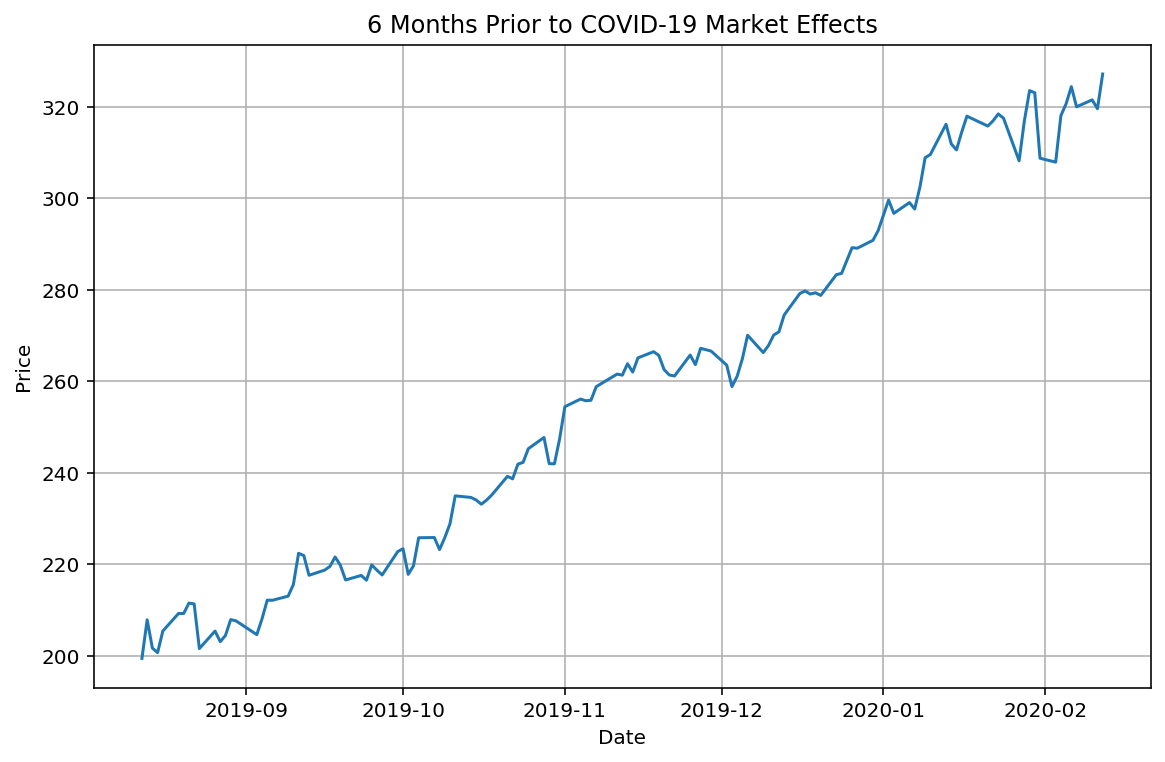

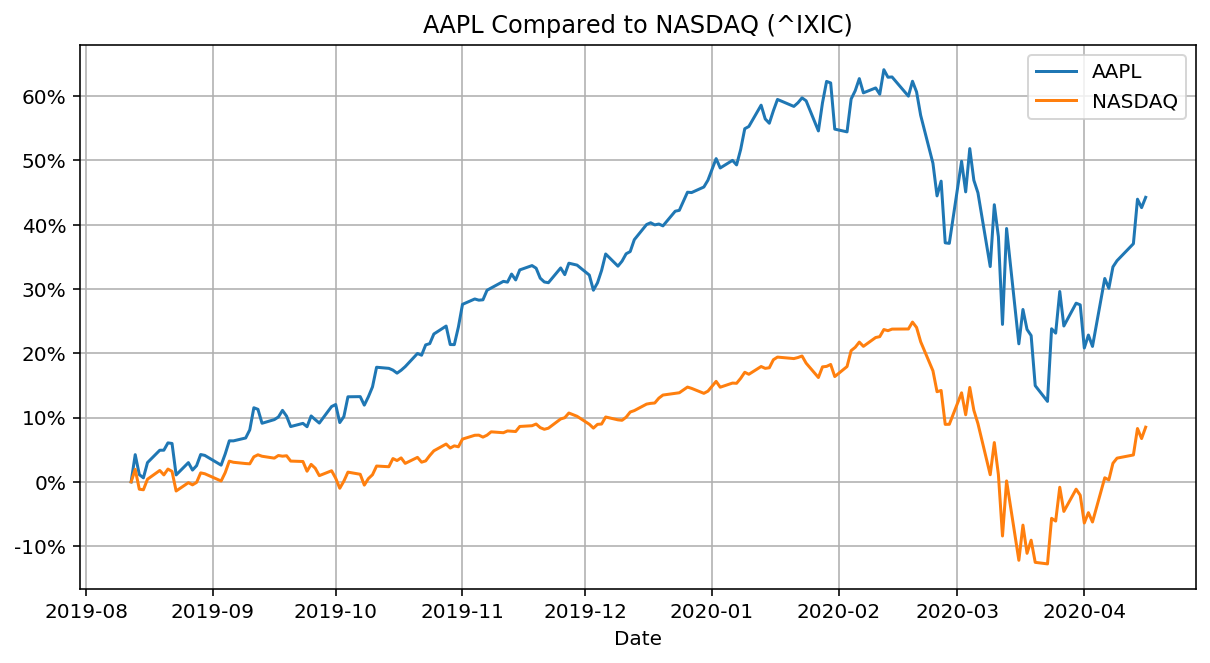

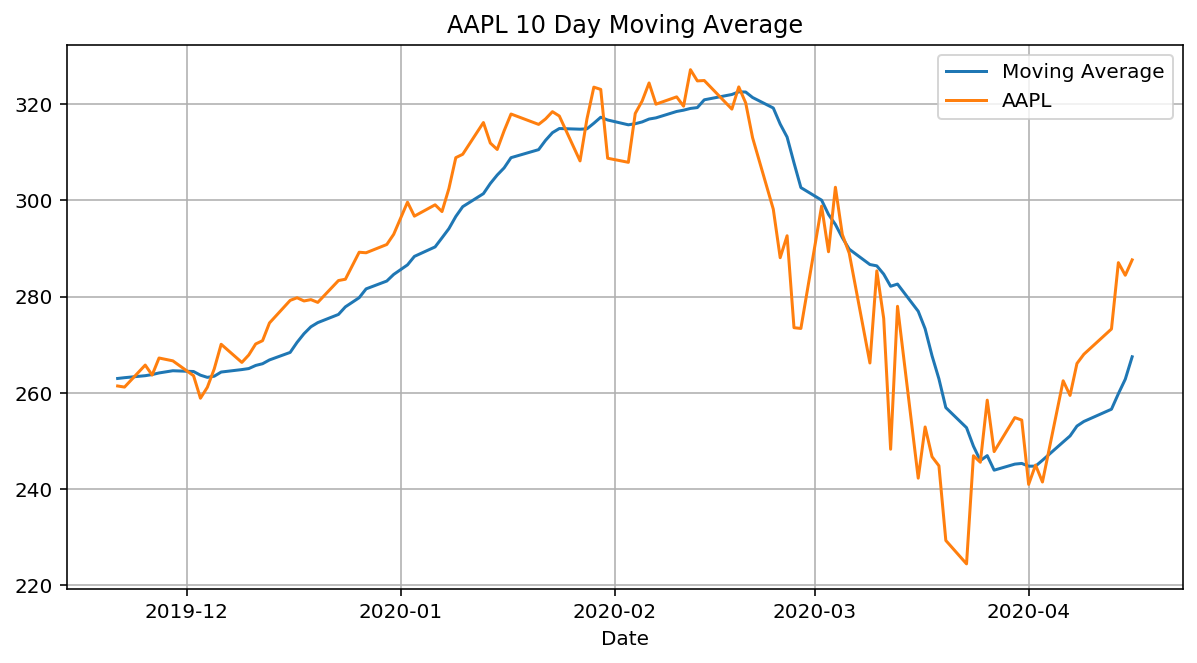

In [25]:
stock_info(data)
pe_ratio(name)
prior(data)
comparison(data, symbol)
recommend(name)
moving_average(data, symbol, 10)